# Financial Stocks Analysis: 6 Bank Stocks from 2000-2022

This will be a quick anlysis and overview of 6 bank stocks and their performance from the beginning from the beginning of the millenium, through the financial crisis and onto February 2022. 

For this analysis we will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

We will look at these stocks' perfomance of from the beginning of millenium, through the financial crisis and seeing how they've performed up to today (February 2022).

In [14]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plotly for last few charts
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


#### Getting the Data
We will get the historical stock data using the stooq API


In [15]:
# Let's Set the Start and End Date from Jan. 1, 2000 to the current day.
start = dt.datetime(2000, 1, 1)
end_today = pd.to_datetime("today")

# Bank of America
BAC = web.DataReader('BAC', 'stooq', start, end_today)

# CitiGroup
C = web.DataReader('C', 'stooq', start, end_today)

# Goldman Sachs
GS= web.DataReader('GS', 'stooq', start, end_today)

# JPMorgan Chase
JPM = web.DataReader('JPM', 'stooq', start, end_today)

# Morgan Stanley
MS= web.DataReader('MS', 'stooq', start, end_today)

# Wells Fargo
WFC = web.DataReader('WFC', 'stooq', start, end_today)

### Combine the Data into One Dataframe

In [16]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
Bank_Stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers).sort_index()

# Set Multilevel Index Labels
Bank_Stocks.columns.names = ['Bank Ticker','Stock Info']

Bank_Stocks.head(10)

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2000-01-03   19.124  19.124  18.265  18.432  15838719.0  354.55  354.55   
2000-01-04   18.174  18.249  17.107  17.340  31540844.0  331.40  332.42   
2000-01-05   17.149  17.673  16.936  17.531  26412431.0  324.41  331.40   
2000-01-06   17.858  19.028  17.793  19.028  20000345.0  327.06  348.61   
2000-01-07   18.883  18.883  18.265  18.527  13443120.0  344.31  350.27   
2000-01-10   18.622  18.622  17.776  17.886  12888418.0  350.27  350.27   
2000-01-11   17.340  17.858  17.340  17.504  12786260.0  340.03  346.44   
2000-01-12   17.504  17.912  17.504  17.693  12789956.0  341.04  350.27   
2000-01-13   17.886  18.215  17.838  18.102  14239568.0  350.27  357.22   
2000-01-14   19.003  19.234  18.575  19.219  23619290.0  359.90  373.41   

Bank Ticker                             ...   MS                        \
Stock Info      Low   Close     Volume  ... Open High Low Close Volume   
Date                                    ...                              
2000-01-03   331.40  337.85  1953904.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-04   316.84  316.84  2791909.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-05   315.18  329.76  2024333.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-06   326.58  345.33  2164586.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-07   336.24  344.31  1620105.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-10   341.04  342.65   987825.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-11   336.73  338.38  1157820.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-12   340.56  350.27  1331057.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-13   348.61  354.55  1438182.0  ...  NaN  NaN NaN   NaN    NaN   
2000-01-14   359.38  369.61  2585374.0  ...  NaN  NaN NaN   NaN    NaN   

Bank Ticker     WFC                                      
Stock Info     Open    High     Low   Close      Volume  
Date                                                     
2000-01-03   13.819  13.842  13.020  13.413  12268781.0  
2000-01-04   12.773  12.922  12.339  12.742  20686276.0  
2000-01-05   12.683  12.941  12.355  12.618  11170740.0  
2000-01-06   12.707  13.369  12.662  13.178  11304597.0  
2000-01-07   13.455  13.604  13.222  13.413  10468852.0  
2000-01-10   13.155  13.244  12.941  12.978  12155008.0  
2000-01-11   12.957  13.020  12.707  12.773   8377579.0  
2000-01-12   12.785  13.244  12.785  13.133   9544045.0  
2000-01-13   13.662  13.880  13.604  13.863  15038319.0  
2000-01-14   14.996  14.996  14.099  14.289  15609060.0  

[10 rows x 30 columns]

### Let's plot the banks stocks prices from 2000 to today (2.10.22)

Obsesrvations
* We can see City stock dominated the financial industry but they took a dive during the financial crisis.
* We can see that although Goldman Sachs also dropped substantially during the 2007-2008 financial crisis, they rebounded rather quickly compared to other banks.

In [17]:
Closing_Prices = Bank_Stocks.xs(key='Close', level='Stock Info', axis=1)

Closing_Prices

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2000-01-03,18.432,337.85,73.386,34.998,NaN,13.413
2000-01-04,17.340,316.84,68.759,34.215,NaN,12.742
2000-01-05,17.531,329.76,65.544,34.024,NaN,12.618
2000-01-06,19.028,345.33,68.344,34.493,NaN,13.178
2000-01-07,18.527,344.31,68.605,35.142,NaN,13.413
...,...,...,...,...,...,...
2022-02-07,48.510,66.36,368.150,153.070,105.18,57.330
2022-02-08,49.380,67.12,370.100,155.950,106.35,58.750
2022-02-09,49.280,67.84,374.530,156.600,108.73,59.060


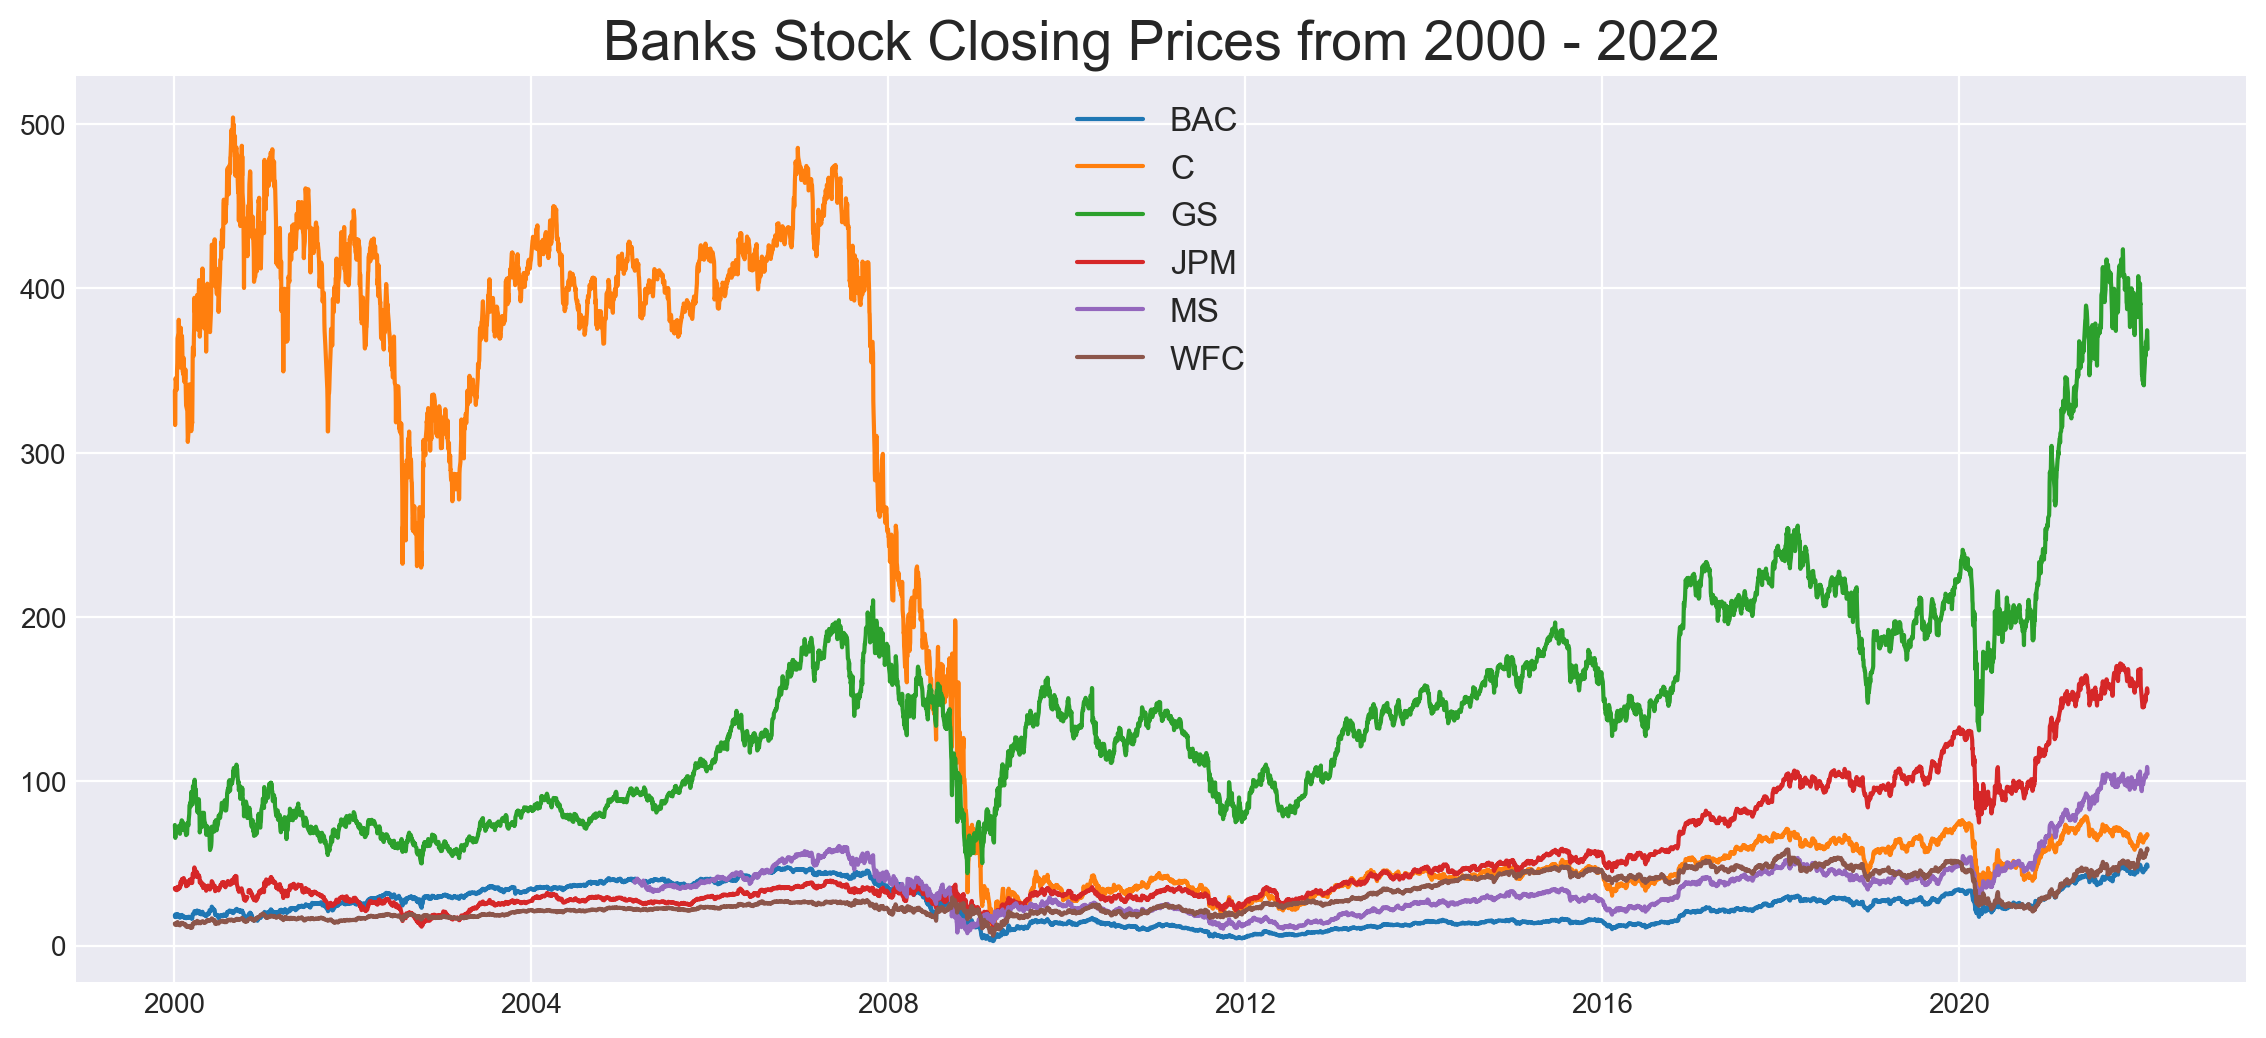

In [39]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,6), dpi=200)
plt.plot(Closing_Prices)
plt.title("Banks Stock Closing Prices from 2000 - 2022", fontsize=20)
plt.legend(tickers, loc=0, fontsize='large');

### What has the Daily Return been for these six banks since the year 2000?


In [19]:
# Let's set and empty dataframe which we will fill with daily return data
returns_df = pd.DataFrame()

for ticker in tickers:
    returns_df[ticker + ' Daily Return'] = Bank_Stocks[ticker]['Close'].pct_change()

returns_df

,BAC Daily Return,C Daily Return,GS Daily Return,JPM Daily Return,MS Daily Return,WFC Daily Return
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.059245,-0.062187,-0.063050,-0.022373,NaN,-0.050026
2000-01-05,0.011015,0.040778,-0.046758,-0.005582,NaN,-0.009732
2000-01-06,0.085392,0.047216,0.042719,0.013784,NaN,0.044381
2000-01-07,-0.026330,-0.002954,0.003819,0.018815,NaN,0.017833
...,...,...,...,...,...,...
2022-02-07,0.004764,0.004237,0.001496,0.003343,0.010278,0.017753
2022-02-08,0.017934,0.011453,0.005297,0.018815,0.011124,0.024769
2022-02-09,-0.002025,0.010727,0.011970,0.004168,0.022379,0.005277


### Which Stock had the most volatility?
##### Below is the standard deviation for each bank stock and we can see Morgan Stanley had the biggest standard deviation throughout the whole time period.

In [20]:
returns_df.std()

BAC Daily Return    0.028607
C Daily Return      0.030463
GS Daily Return     0.023306
JPM Daily Return    0.024412
MS Daily Return     0.031750
WFC Daily Return    0.024513
dtype: float64

### What was the date with the lowest return for each bank?
##### We can see all banks had their lowest return on 2008 or 2009. Bank of America, Goldman Sachs, Morgan Stanley, JP Morgan Chase, and Wells Fargo all had their lowest daily return on the same data.

In [21]:
returns_df.idxmin()

BAC Daily Return   2009-01-20
C Daily Return     2009-02-27
GS Daily Return    2009-01-20
JPM Daily Return   2009-01-20
MS Daily Return    2008-10-09
WFC Daily Return   2009-01-20
dtype: datetime64[ns]

### What were the dates with highest return for each bank?

In [22]:
returns_df.idxmax()

BAC Daily Return   2009-04-09
C Daily Return     2008-11-24
GS Daily Return    2008-11-24
JPM Daily Return   2009-01-21
MS Daily Return    2008-10-13
WFC Daily Return   2008-07-16
dtype: datetime64[ns]

Text(0.5, 1.0, 'Distribution of Morgan Stanley Returns from 2015 - 2022 So Far')

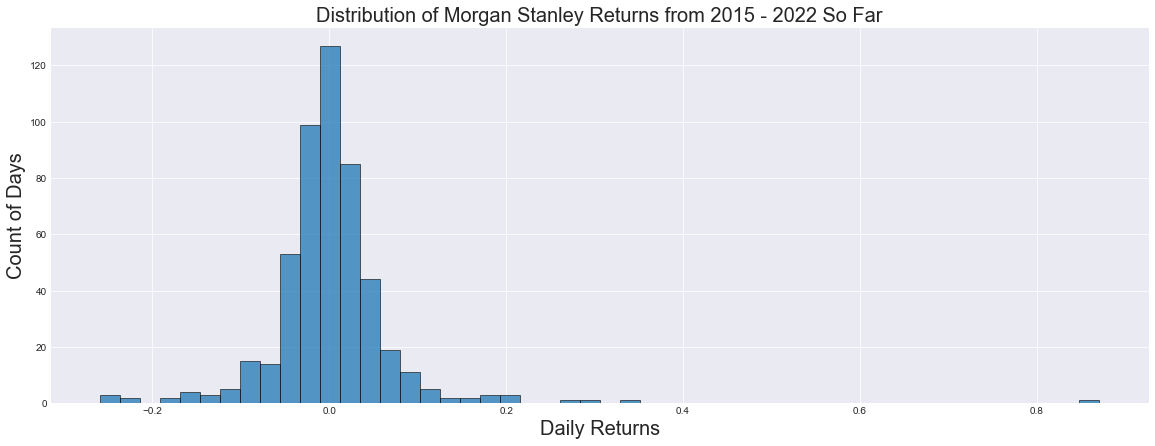

In [23]:
sns.displot(returns_df.loc['2008':'2009']['MS Daily Return'], bins =50).figure.set_size_inches(18, 6)
plt.xlabel('Daily Returns', fontsize=20)
plt.ylabel('Count of Days', fontsize=20)
plt.title('Distribution of Morgan Stanley Returns from 2015 - 2022 So Far', fontsize=20)

Text(0.5, 1.0, 'Distribution of Goldman Sachs Returns from 2015 - 2022 So Far')

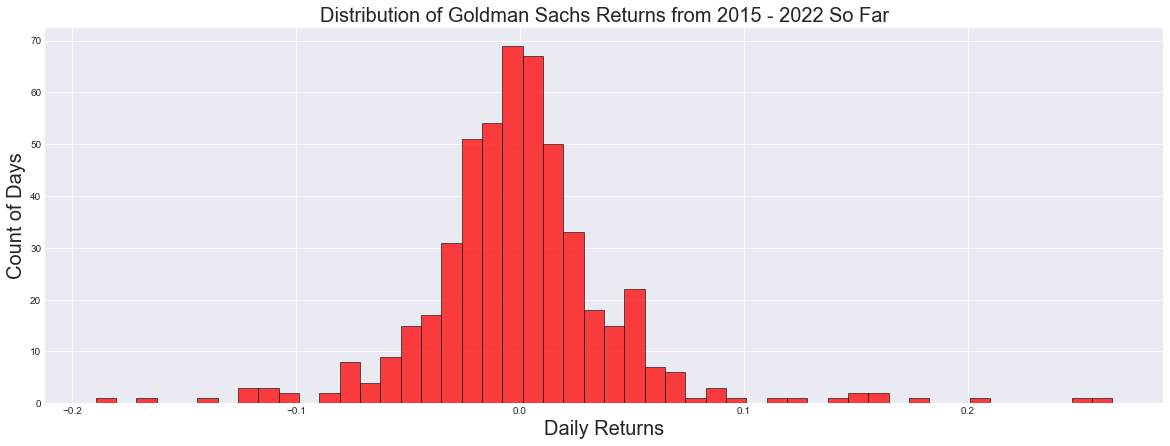

In [24]:
GS_dist = sns.displot(returns_df.loc['2008':'2009']['GS Daily Return'], bins =50, color='red').figure.set_size_inches(18, 6)
plt.xlabel('Daily Returns', fontsize=20)
plt.ylabel('Count of Days', fontsize=20)
plt.title('Distribution of Goldman Sachs Returns from 2015 - 2022 So Far', fontsize=20)

### Moving Averages

##### Let's analyze the moving averages for these stocks in the year 2007-2008. 

* This plot shows the rolling 30 day average against the Close Price for Bank Of America's stock for 2007 and 2008

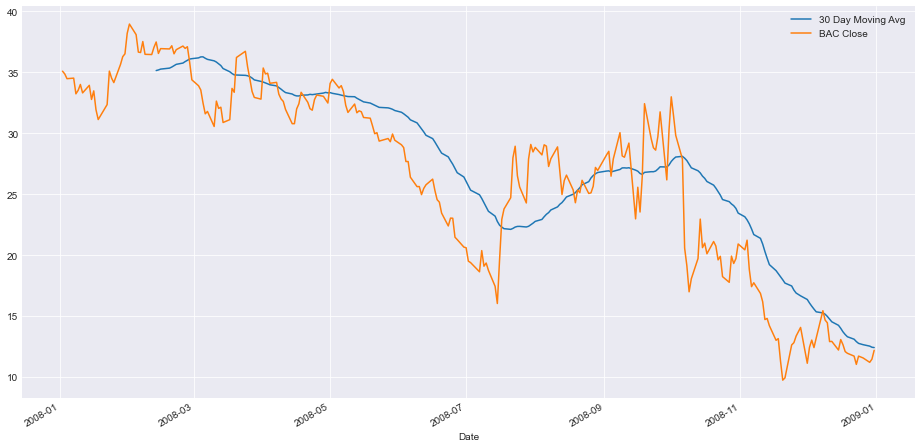

In [25]:
plt.figure(figsize=(16,8))
Closing_Prices['BAC'].loc['2008'].rolling(window=30).mean().plot(label='30 Day Moving Avg')
Closing_Prices['BAC'].loc['2008'].plot(label='BAC Close')
plt.legend()

### What is the correlation between these stocks?

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

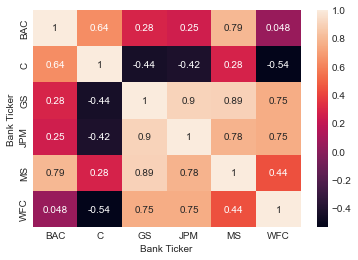

In [26]:
sns.heatmap(Closing_Prices.corr(), annot=True)

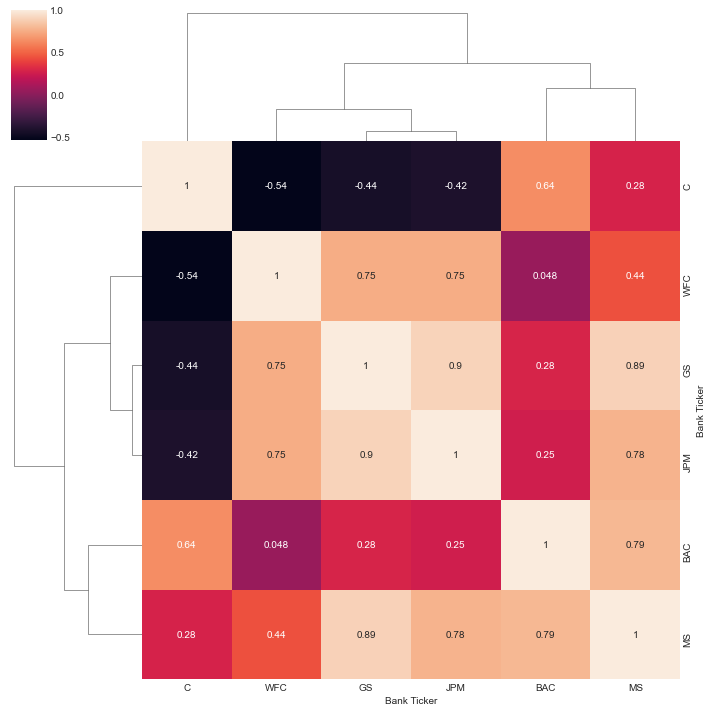

In [27]:
sns.clustermap(Closing_Prices.corr(), annot=True)

In [28]:
BAC_15 = BAC[['Open','High','Low','Close']].loc['2015']

BAC_15.iplot(kind='candle')

### Simple Moving Average for Morgan Stanley in 2015

### Bollinger Band Plot for Bank of America for the year 2015

In [29]:
BAC['Close'].loc['2015'].ta_plot(study='boll')